In [1]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#READING THE FILE
cr=pd.read_csv("Placement_Data_Full_Class.csv")

In [3]:
#DISPLAYING FIRST 5 DATA OF DATASET
cr.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
#CHECKING DATA INFO
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
#OMITTING THE UNNECESSARY DATA
cr.drop(['sl_no','ssc_b','hsc_b'],axis=1,inplace=True)

In [6]:
cr.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
#HANDLING THE MISSING DATA
cr.fillna(value=0,inplace=True)

In [8]:
#CHECKING THE NUMBER OF MISSING DATA
cr.isnull().sum()

gender            0
ssc_p             0
hsc_p             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Text(0.5, 1.0, 'Employability percentage')

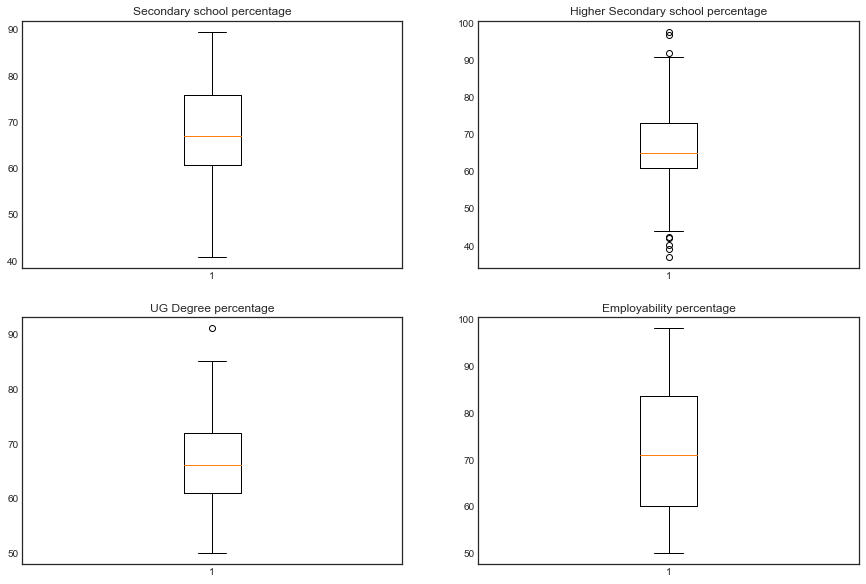

In [9]:
#PLOTTING BOX PLOT TO CHECK FOR OUTLIERS
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(cr['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(cr['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(cr['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(cr['etest_p'])
ax.set_title('Employability percentage')



In [10]:
#REMOVING OUTLIERS
Q1 = cr['hsc_p'].quantile(0.25)
Q3 = cr['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (cr['hsc_p'] >= Q1 - 1.5 * IQR) & (cr['hsc_p'] <= Q3 + 1.5 *IQR)
cr_filtered=cr.loc[filter]

Text(0.5, 1.0, 'After removing outliers(hsc_p)')

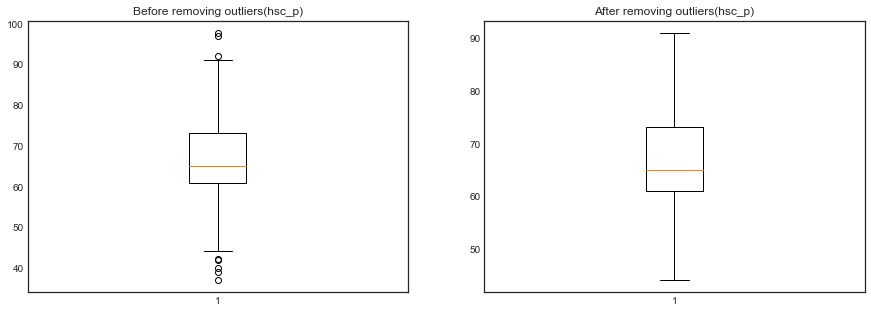

In [11]:
#PLOTTING THE BOX PLOT
plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')
ax=plt.subplot(121)
plt.boxplot(cr['hsc_p'])
ax.set_title('Before removing outliers(hsc_p)')
ax=plt.subplot(122)
plt.boxplot(cr_filtered['hsc_p'])
ax.set_title('After removing outliers(hsc_p)')

In [12]:
cr=cr_filtered

In [13]:
#ASSIGNING NECESSARY FEATURES TO X
x=cr.iloc[:,:-2]

In [14]:
#ASSIGNING TARGET VARIABLE TO Y
y=cr.iloc[:,-2]

In [15]:
x

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50
...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49
211,M,58.00,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62
212,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72
213,F,74.00,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23


In [16]:
y

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 207, dtype: object

In [17]:
#LABEL ENCODING Y DATA
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)

In [18]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0])

In [19]:
#FETCHING FREQUENCY OF OCCURANCE OF CATEGORY 
cr['gender'].value_counts()

M    134
F     73
Name: gender, dtype: int64

In [20]:
#FETCHING FREQUENCY OF OCCURANCE OF CATEGORY
cr['workex'].value_counts()

No     135
Yes     72
Name: workex, dtype: int64

In [21]:
#FETCHING FREQUENCY OF OCCURANCE OF CATEGORY
cr['specialisation'].value_counts()

Mkt&Fin    115
Mkt&HR      92
Name: specialisation, dtype: int64

In [22]:
#FETCHING FREQUENCY OF OCCURANCE OF CATEGORY
cr['hsc_s'].value_counts()

Commerce    111
Science      86
Arts         10
Name: hsc_s, dtype: int64

In [23]:
#FETCHING FREQUENCY OF OCCURANCE OF CATEGORY
cr['degree_t'].value_counts()

Comm&Mgmt    141
Sci&Tech      57
Others         9
Name: degree_t, dtype: int64

In [24]:
#LABEL ENCODING CATEGORICAL DATA
x=cr.apply(LabelEncoder().fit_transform)

In [25]:
x

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,43,88,1,14,2,0,8,1,61,1,20
1,1,77,74,2,73,2,1,73,0,148,1,1
2,1,39,46,0,26,0,0,54,0,47,1,13
3,1,20,9,2,3,2,0,36,1,68,0,0
4,1,93,65,1,64,0,0,95,0,26,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80,79,1,75,0,0,82,0,191,1,37
211,1,23,19,2,59,2,0,51,0,12,1,21
212,1,43,44,1,63,0,1,24,0,173,1,28
213,0,61,40,1,14,0,0,44,1,77,1,2


In [26]:
#CREATING DUMMY VARIABLE
x=pd.get_dummies(x, columns=['hsc_s', 'degree_t'])

In [27]:
x

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_0,hsc_s_1,hsc_s_2,degree_t_0,degree_t_1,degree_t_2
0,1,43,88,14,0,8,1,61,1,20,0,1,0,0,0,1
1,1,77,74,73,1,73,0,148,1,1,0,0,1,0,0,1
2,1,39,46,26,0,54,0,47,1,13,1,0,0,1,0,0
3,1,20,9,3,0,36,1,68,0,0,0,0,1,0,0,1
4,1,93,65,64,0,95,0,26,1,40,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80,79,75,0,82,0,191,1,37,0,1,0,1,0,0
211,1,23,19,59,0,51,0,12,1,21,0,0,1,0,0,1
212,1,43,44,63,1,24,0,173,1,28,0,1,0,1,0,0
213,0,61,40,14,0,44,1,77,1,2,0,1,0,1,0,0


In [28]:
#OMITTING UNNECESSARY COLUMNS
x=x.drop(columns=['status','salary'])

In [29]:
x

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_0,hsc_s_1,hsc_s_2,degree_t_0,degree_t_1,degree_t_2
0,1,43,88,14,0,8,1,61,0,1,0,0,0,1
1,1,77,74,73,1,73,0,148,0,0,1,0,0,1
2,1,39,46,26,0,54,0,47,1,0,0,1,0,0
3,1,20,9,3,0,36,1,68,0,0,1,0,0,1
4,1,93,65,64,0,95,0,26,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80,79,75,0,82,0,191,0,1,0,1,0,0
211,1,23,19,59,0,51,0,12,0,0,1,0,0,1
212,1,43,44,63,1,24,0,173,0,1,0,1,0,0
213,0,61,40,14,0,44,1,77,0,1,0,1,0,0


In [30]:
#DIVIDING THE DATA
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8,random_state=1)

In [31]:
#LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
#CONFUSION MATRIX FOR LOGISTIC REGRESSION
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 8  7]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.79      0.96      0.87        27

    accuracy                           0.81        42
   macro avg       0.84      0.75      0.77        42
weighted avg       0.82      0.81      0.80        42



In [33]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt = dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7380952380952381


In [34]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rt=RandomForestClassifier(n_estimators=100)
rt.fit(x_train,y_train)
y_pred=rt.predict(x_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7380952380952381


In [35]:
#KNN CLASSIFIER
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 6  9]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.74      0.96      0.84        27

    accuracy                           0.76        42
   macro avg       0.80      0.68      0.69        42
weighted avg       0.78      0.76      0.73        42



In [36]:
#NAIVE BAYES MODEL
from sklearn.naive_bayes import BernoulliNB 
from sklearn.model_selection import cross_val_score
gnb = BernoulliNB() 
gnb.fit(x_train, y_train) 
  
#Applying and predicting 
y_pred = gnb.predict(x_test) 
cv_scores = cross_val_score(gnb, x, y, 
                            cv=10,
                            scoring='precision')
print("Cross-validation precision: %f" % cv_scores.mean())

Cross-validation precision: 0.728824


In [37]:
#SVM MODEL
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)
confusion_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[10  5]
 [ 2 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.83      0.93      0.88        27

    accuracy                           0.83        42
   macro avg       0.83      0.80      0.81        42
weighted avg       0.83      0.83      0.83        42

